In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("income.csv")
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [5]:
df['income_level'].value_counts()

0    37155
1    11687
Name: income_level, dtype: int64

In [6]:
df['education_num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

In [7]:
# All data are numbers there is no null or missed values
df.isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

In [8]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  income_level  
count    48842.000000  48842.000000  
mean        40.422382      0.239282  
std         12.391444      0.426649  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

<AxesSubplot:xlabel='income_level', ylabel='count'>

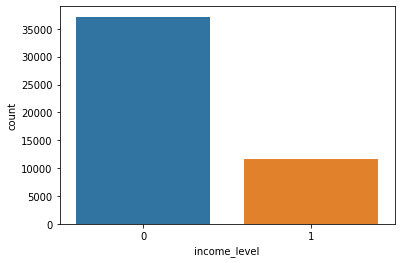

In [9]:
sns.countplot(x = "income_level", data = df)

In [10]:
features = df.drop(['income_level'], axis = 1)
labels = df['income_level']

In [11]:
# encode labels from names to numbers
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

In [12]:
# scale the features to [0-1] scale
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [14]:
features

array([[0.30136986, 0.04413121, 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.04805174, 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13758131, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.28767123, 0.24537874, 0.8       , 0.        , 0.        ,
        0.5       ],
       [0.36986301, 0.04844413, 0.8       , 0.05455055, 0.        ,
        0.39795918],
       [0.24657534, 0.11491866, 0.8       , 0.        , 0.        ,
        0.60204082]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [16]:
X_train.shape

(34189, 6)

In [17]:
y_train.shape

(34189,)

In [18]:
 X_test.shape

(14653, 6)

In [19]:
y_test.shape

(14653,)

In [20]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [21]:
def compute_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    cost = 0.
    
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m                                     
     

    return cost

In [22]:
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*X[i][j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] += (f_wb - y[i])* X[i][j]
            
            
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_db, dj_dw

In [23]:
# Compute and display gradient with w initialized to zeroes
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.2615607359092106
dj_dw at initial w (zeros):[0.058647598342334795, 0.031489647159026996, 0.13369797303228434, -0.004546037592348169, -0.0005630163778451794, 0.09273092371873408]


In [24]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [25]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 200
alpha = 4

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.49   
Iteration   20: Cost     0.46   
Iteration   40: Cost     0.45   
Iteration   60: Cost     0.44   
Iteration   80: Cost     0.44   
Iteration  100: Cost     0.44   
Iteration  120: Cost     0.43   
Iteration  140: Cost     0.43   
Iteration  160: Cost     0.43   
Iteration  180: Cost     0.43   
Iteration  199: Cost     0.43   


In [26]:
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i][j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
         
    return p

In [27]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 80.049139


In [28]:
#Compute accuracy on our training set
p = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

Test Accuracy: 79.239746


In [29]:
#calculating precision and reall
precision = precision_score(y_test, p)
recall = recall_score(y_test, p)
 
print('Precision: ',precision)
print('Recall: ',recall)
 

Precision:  0.65113427345187
Recall:  0.3004243281471004


In [30]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = (2*precision*recall)/(precision+recall)
    return f1_score

In [31]:
f1_score_tr = F1_score(y_test, p)
print(f1_score_tr)

0.41114982578397213


In [32]:
confusion_matrix(y_test, p)


array([[10549,   569],
       [ 2473,  1062]], dtype=int64)